# Project description

You've done beautifully in the Practicum course, and you've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.

You have:
* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* Dump file with all orders for the period
* Marketing expenses statistics

You are going to study:
* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

# Instructions for completing the project

# Step 1. Download the data and prepare it for analysis

Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.

File paths:
* `'/datasets/visits_log_us.csv.'`
* `'/datasets/orders_log_us.csv.'`
* `'/datasets/costs_us.csv.'`

# Step 2. Make reports and calculate metrics:

1. Product
* How many people use it every day, week, and month?
* How many sessions are there per day? (One user might have more than one session.)
* What is the length of each session?
* What's the user retention rate?
2. Sales
* When do people start buying? What is the time that elapses between registration and conversion? When the user becomes a customer?
* How many orders do they make during a given period of time?
* What is the average purchase size?
* How much money do they bring? 
3. Marketing
* How much money was spent? Overall, per source and over time.
* How much did customer acquisition from each of the sources cost?
* How worthwhile where the investments? 

Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

# Step 3. Write a conclusion: advise marketing experts how much money to invest and where.

What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

# Description of the data

The visits table (server logs with data on website visits):
* `'Uid'` — user's unique identifier
* `'Device'` — user's device
* `'Start Ts'` — session start date and time
* `'End Ts'` — session end date and time
* `'Source Id'` — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The orders table (data on orders):
* `'Uid'` — unique identifier of the user making an order
* `'Buy Ts'` — order date and time
* `'Revenue'` — Yandex.Afisha's revenue from the order

The costs table (data on marketing expenses):
* `'source_id'` — ad source identifier
* `'dt'` — date
* `'costs'` — expenses on this ad source on this day

## Download the data and prepare it for analysis

### Optimization of the data

To start our analysis, we will import forst all necessery libraries, such as - pansa, numpy, functools, matplolib and seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from functools import reduce
import plotly.express as px

We will try to import 500 raws of the data from the following path by `try - except` block to determie how to optimize the import of all data.
* `'/datasets/visits_log_us.csv.'`
* `'/datasets/orders_log_us.csv.'`
* `'/datasets/costs_us.csv.'`

In [2]:
try:
    visits_raw = pd.read_csv('visits_log_us.csv', nrows=500)
    orders_raw = pd.read_csv('orders_log_us.csv', nrows=500)
    orders_raw = pd.read_csv('orders_log_us.csv', nrows=500)
except:
    visits_raw = pd.read_csv('/datasets/visits_log_us.csv',nrows=500)
    order_raws = pd.read_csv('/datasets/orders_log_us.csv', nrows=500)
    costs_raw = pd.read_csv('/datasets/costs_us.csv', nrows=500)

Let's check the information of each tables with its exact size using `memory_usage='deep'`.

In [3]:
visits_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [4]:
visits_raw['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

The visits table (server logs with data on website visits) includes the following columns:
* `'Uid'` — user's unique identifier
* `'Device'` — user's device
* `'Start Ts'` — session start date and time
* `'End Ts'` — session end date and time
* `'Source Id'` — identifier of the ad source the user came from.

The size of the raw table is 113.1 KB.\
The `Device` column has only 2 variables - ` desktop` or `touch`.

We can optimize the import of the data in this table when we will:
* Import the variables in the `Device` column as category.
* Import the variables in `End Ts` and `Start Ts` as dates.

In [5]:
order_raws.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


The orders table (data on orders) includes the following columns:
* `'Uid'` — unique identifier of the user making an order
* `'Buy Ts'` — order date and time
* `'Revenue'` — Yandex.Afisha's revenue from the order

We have 3 columns and the table size is 45 KB.

We can optimize the upload of this data by importing `Buy Ts` as dates.

In [6]:
costs_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


The costs table (data on marketing expenses) includes the following columns:
* `'source_id'` — ad source identifier
* `'dt'` — date
* `'costs'` — expenses on this ad source on this day

We have 3 columns and the table size is 40.7 KB.

We can optimize the upload of this data by importing the variables in `dt` column as dates.

To optimize the import we need to:
* import the variables of the `Device` column in the visits table as `category` type using `dtype=()` method.
* import using `parse_dates = []` method in the following columns-
    * `Start Ts` and `End Ts` columns from `visits` table.
    * `Buy Ts` column from the `orders` table.
    * `dt` column from the `costs` table. 
    
The optimized data will be stored in the following tables - `visits`, `orders` and `costs`.

In [7]:
try:
    visits = pd.read_csv('visits_log_us.csv', dtype={'Device':'category'}, parse_dates = ['Start Ts', 'End Ts'])
    orders = pd.read_csv('orders_log_us.csv', parse_dates = ['Buy Ts'])
    costs = pd.read_csv('orders_log_us.csv', parse_dates = ['dt'])
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device':'category'}, parse_dates = ['Start Ts', 'End Ts'])
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates = ['Buy Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv', parse_dates = ['dt'])

Now let's continue to prepare our data to ananlysis.

### `visits`

In [8]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


We have 5 columns and 359400 rows. The size of the table is 11.3 MB. We have no missing values.\
The variables in the `Device` column are imported as category. The variables in the `End Ts` and `Start Ts` columns are imported as datetime64[ns]. The varaibled in the `Source Id` are imported as int64 and the variables in the `Uid` colunm are imported as unsigned integer 64.

Let's check the unique values in the `device` and `source_id`.

In [10]:
print(visits['Device'].unique())
np.sort(visits['Source Id'].unique())

['touch', 'desktop']
Categories (2, object): ['touch', 'desktop']


array([ 1,  2,  3,  4,  5,  6,  7,  9, 10])

 As accepted, there is only two variables in the `Device` column - `desktop` and `touch`.\
 And we have 10 type of source ad. Let's check their distribution by `.value_counts()`.

In [11]:
print(visits['Device'].value_counts())
visits['Source Id'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64


4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

It looks like that most user's use the `desktop` platfom and arrive from the 4th source ad. We will investigate it more in our next steps.

Let's check for duplicates.

In [12]:
visits.duplicated().sum()

0

No duplicates and no missing values!\
Let's change the columns name to lowercase using `.str.lower()` and the spaces into underscore using `.str.replace()` to simplify our future analysis.

In [13]:
visits.columns= visits.columns.str.replace(' ','_').str.lower()
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Our data from the `visits` dataFrame is ready. Let's move on to the `orders` dataFrame.

### `orders`

In [14]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [15]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


We have 3 columns and 50415 rows (less than in the `visits` table). The size of the table is 1.2 MB. We have no missing values.\
The variables in the `Buy Ts` column are imported as datetime64[ns]. The varaibled in the `Revenue` are imported as float64. And the variables in the `Uid` colunm are imported as unsigned integer 64.

Let's check for duplicates.

In [16]:
orders.duplicated().sum()

0

No duplicates. 

Using the same method as previously, let's change the columns name to lowercase using and the spaces into underscore to simplify our future analysis.

In [17]:
orders.columns= orders.columns.str.replace(' ','_').str.lower()

The `orders` dataFrame is ready for the analysis. Let's move on the next table `costs`

### `costs`

In [18]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [19]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


We have 3 columns and 2542 rows ( less than in `visits` and `orders`. The size of the table is 59.7 Kb. We have no missing values.\
The variables in the `source_id` column are imported as int64. The variables in the `dt` datetime64[ns]. And the varaibled in the `costs` are imported as float64.
The columns name int this table is already in lowercase and with underscore. So no processing is needed.

Let's check the destribution of the `source_id` using `.value_counts()`.

In [20]:
costs.source_id.value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

It looks like all source ad where invested equaly except the 6th source ad which is not shown in the table. We recommend checking why the 6th source ad is not represented in this data.

Let's check for duplicates.

In [21]:
costs.duplicated().sum()

0

No duplictes.

Now that all our data is prepared, we can continue with our analysis.

## Make reports and calculate metrics

We will need to answer the following  questions -
1. Product
* How many people use it every day, week, and month?
* How many sessions are there per day? 
* What is the length of each session?
* What's the user retention rate?

2. Sales
* When do people start buying? What time elapses between registration and conversion? When the user becomes a customer?
* How many orders do they make during a given period of time?
* What is the average purchase size?
* How much money do they bring? 
3. Marketing
* How much money was spent? Overall, per source and over time.
* How much did customer acquisition from each of the sources cost?
* How worthwhile where the investments?

For each question, we will represent the metrics in general, for various devices and various sources.

### Product

#### How many people use it every day, week, and month?

To answer this questiom, we will need to creat new columns that will represent the beging of the session of each visit - 
* `start_session_year` - the year of the beging session using `.dt.year` method.
* `start_session_month` - the month of the beging session using `.astype('datetime64[M]')` method.
* `start_session_week` - the week of the beging session using `.astype('datetime64[W]')` method.
* `start_session_date` - the day of the beging session using `.dt.date` method.


In [22]:
visits['start_year'] = visits['start_ts'].dt.year
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')
visits['start_week'] = visits['start_ts'].astype('datetime64[W]')
visits['start_day'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_week,start_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


##### General user activity 

To find the daily, weekly and monthly user activity, we will group the `visits` table by `start_session_year` and the `start_session_date`, `start_session_week` or `start_session_month` and count the unique user id.\
* `dau` will represent the daily user activity and `dau_avg` will represnt the average daily user activity.
* `wau` will represent the weekly user activity,`wau_avg` will represnt the average weekly user activity and `sticky_wau` will represnet the weekly stcky factor. 
* `mau` will represent the monthly user activity, `mau_avg` will represnt the average monthly user activity and `sticky_mau` will represenyt the monthly sticky factor.

Average daily user activity: 907


<AxesSubplot:title={'center':'Daily User Activity'}, xlabel='Daily Session', ylabel='Unique User Count'>

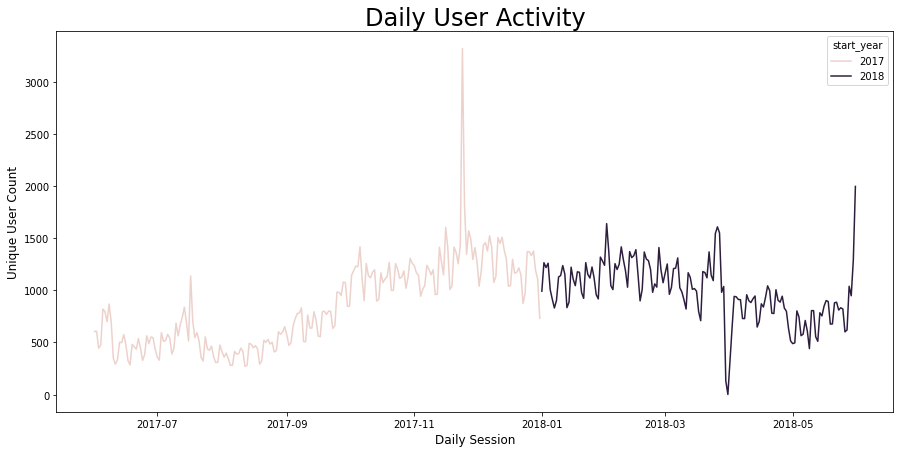

In [23]:
dau = visits.groupby(['start_year','start_day']).agg({'uid':'nunique'}).reset_index()
dau_avg =dau['uid'].mean()
print('Average daily user activity:', int(dau_avg))
plt.figure(figsize=(15,7))
plt.title('Daily User Activity',size=24)
plt.xlabel('Daily Session', size=12)
plt.ylabel('Unique User Count', size=12)
plt.legend([ '2017','2018'], title="Session Year")
sns.lineplot(data=dau, x="start_day", y="uid",hue='start_year')

We can see: 
* The average daily user activity is 907. 
* Up to 2017-10, user activity is less than 1000.
* From 2017-10 and until 2018-04, the user activity is between 1000 - 1500 with a high peack of over 30000 users in 2017-12.
* From 2018-04 and until 2018-06, the user activity is ahain less than 1000 with a lowest peack, almost 0 users at 2018-04 and a second high peack at the end of 2018-06.

Average weekly user activity: 5621
The weekly sticky factor is: 16


<AxesSubplot:title={'center':'Weekly User Activity'}, xlabel='Weekly Session', ylabel='Unique User Count'>

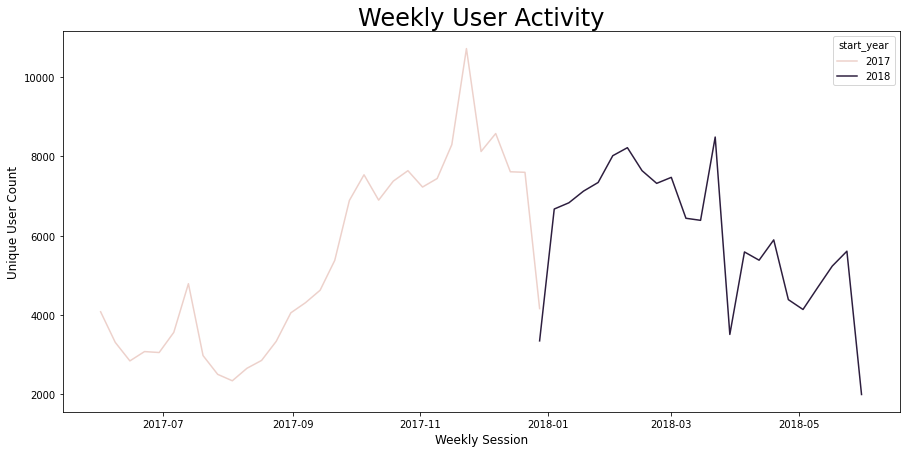

In [24]:
wau = visits.groupby(['start_year','start_week']).agg({'uid':'nunique'}).reset_index()
wau_avg = wau['uid'].mean()
print('Average weekly user activity:', int(wau_avg))
sticky_wau=dau_avg/wau_avg*100
print('The weekly sticky factor is:',int(sticky_wau))
plt.figure(figsize=(15,7))
plt.title('Weekly User Activity',size=24)
plt.xlabel('Weekly Session', size=12)
plt.ylabel('Unique User Count', size=12)
plt.legend([ '2017','2018'], title="Session Year")
sns.lineplot(data=wau, x="start_week", y="uid",hue='start_year')

We can see:
 * The average weekly user activity is 5621.
 * 16% of user are revisiting the site.
 * From 2017-07 and until 2017-09, weekly user activity is less than 4000 when we have a high peack in 2017-07.
 * From 2017-09 and until 2018-04, weekly user activity is between 4000 and 1200. We have the highest peack with over 10000 users and a low peack with less tan 4000 at 2017-12.
 * From 2018-04 and until 2018-06, the user activity is less than 6000 and with the lowest peack, almost 0 users at 2018-06.
Almost the same behavior as in the daily activity user. 

Average monthly user activity: 23228
The monthly sticky factor is: 3


<AxesSubplot:title={'center':'Monthly User Activity'}, xlabel='Monthly Session', ylabel='Unique User Count'>

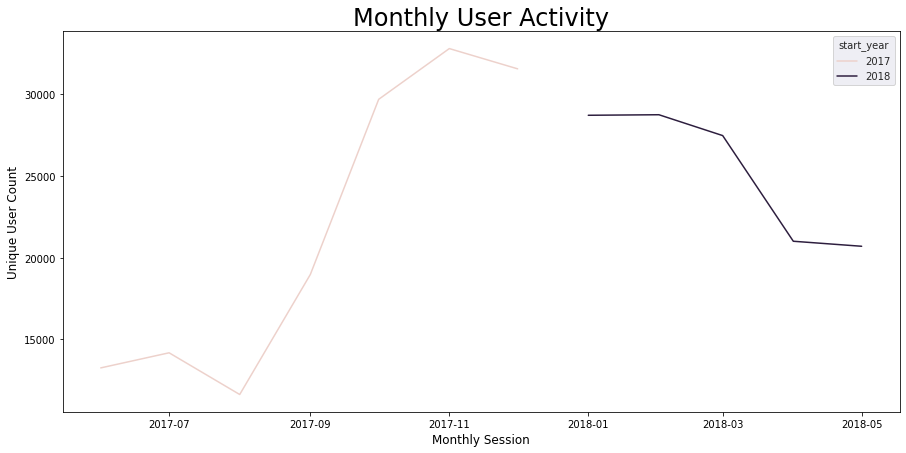

In [25]:
mau = visits.groupby(['start_year','start_month']).agg({'uid':'nunique'}).reset_index()
mau_avg = mau['uid'].mean()
print('Average monthly user activity:', int(mau_avg))
sticky_mau=dau_avg/mau_avg*100
print('The monthly sticky factor is:',int(sticky_mau))
plt.figure(figsize=(15,7))
plt.title('Monthly User Activity',size=24)
plt.xlabel('Monthly Session', size=12)
plt.ylabel('Unique User Count', size=12)
sns.set_style("darkgrid")
plt.legend([ '2017','2018'], title="Session Year")
sns.lineplot(data=mau, x="start_month", y="uid", hue="start_year")

We can see that:
* The average monthly user activity is 23338.
* 3% of user revisit the site.
* From 2017-06 and until the end of 2017-08, the monthly user activity is less than 15000. 
* From 2017-10 and until 2017-12, the monthly user actibity raises higher than 30000. And from 2017-12, the monthly user acivity descend up to 20000 users.
* It looks like we don't have data on April 2018. 

##### User activity per various device

Let's check the user's activy accroding to the device type by the same method as we analysed before.
* `dau_device` will represent the daily user activity and `dau_device_avg` will represnt the average daily user activity.
* `wau_device` will represent the weekly user activity, `wau_device_avg` will represnt the average weekly user activity and `sticky_wau_device`  will represent for each platfrom the weekly sticky factor.
* `mau_device` will represent the monthly user activity, `mau_device_avg` will represnt the average monthly user activity and `sticky_wau_device`  will represent for each platfrom the weekly sticky factor.

In [ ]:
dau_device = visits.groupby(['device','start_year','start_day']).agg({'uid':'nunique'}).reset_index()
dau_device_avg=dau_device.groupby('device').agg({'uid':'mean'})
print('Average daily user activity per device:')
print(dau_device_avg)
plt.figure(figsize=(15,7))
plt.title('Daily User Activity Per Device',size=24)
plt.xlabel('Daily Session', size=12)
plt.ylabel('Unique User Count', size=12)
sns.lineplot(data=dau_device, x="start_day", y="uid",hue='device')

Average daily user activity per device:
                uid
device             
desktop  329.622253
touch    126.089286


We can see:
* On both platforms, the daily user acitivity is less than 500 users.
* At 2017-12, we have the highest peack on both platfroms.
* At 2018-04, we have the lowest peack on both platfroms.
* The desktop platfrom has higher daily user activiry than the touck paltform during the half seesion. 

In [ ]:
wau_device = visits.groupby(['device','start_year', 'start_week']).agg({'uid':'nunique'}).reset_index()
wau_device_avg=wau_device.groupby('device').agg({'uid':'mean'})
print('Average weekly user activity per device:')
print(wau_device_avg)
print()
sticky_wau_device= (dau_device_avg['uid']/wau_device_avg['uid']*100)
print('The weekly sticky factor per device is:')
print(sticky_wau_device)
plt.figure(figsize=(15,7))
plt.title('Weekly User Activity Per Device',size=24)
plt.xlabel('Weekly Session', size=12)
plt.ylabel('Unique User Count', size=12)
sns.lineplot(data=wau_device, x="start_week", y="uid",hue='device')

We can see:
* From 2017-06 and until 2017-20 and from 2018-04 and until 2018-06 -
    * the weekly user activity for desktop platfrom is less than 2000.
    * the weekly user activity for touch platfrom is less than 1000.
* From 2017-10 and until 2018-04 -
    * the weekly user activity for desktop platform is between 2000 and 4000 when it reaches its higest peack in 2017-12 with 4000.
    * the weekly user activity for desktop platform is higher than 1000.
* Desktop platform has a double avegage weekly user activity than the touch platform.
* In both devices, the weekly sticky factor is around 15%.     

In [ ]:
mau_device = visits.groupby(['device','start_year', 'start_month']).agg({'uid':'nunique'}).reset_index()
mau_device_avg=mau_device.groupby('device').agg({'uid':'mean'})
print('Average monthly user activity per device:')
print(mau_device_avg)
print()
sticky_mau_device= (dau_device_avg['uid']/mau_device_avg['uid']*100)
print('The monthly sticky factor per device is:')
print(sticky_mau_device)
plt.figure(figsize=(15,7))
plt.title('Monthly User Activity Per Device',size=24)
plt.xlabel('Monthly Session', size=12)
plt.ylabel('Unique User Count', size=12)
sns.lineplot(data=mau_device, x="start_month", y="uid",hue='device')

We can see:
* The monthly user acitivity for desktop device is double than the youch device.
* Never the less, the monthly sticky factor for both devices is almost 4%. 
* From 2017-06 and until 2017-08, both devices have the lowest monthly acticity reach during this session.
* From 2017-10, the monthly acitivity raises to its highest in both platforms until 2017-12.
* Then, it start to descend in both devices. 

#####  User activity for various sources

Let's check the user's activy accroding to the source type by the same method as we analysed before.
* `dau_source` will represent the daily user activity and `dau_source_avg` will represnt the average daily user activity.
* `wau_source` will represent the weekly user activity and `wau_source_avg` will represnt the average weekly user activity.
* `mau_source` will represent the monthly user activity and `mau_source_avg` will represnt the average monthly user activityg.

In [ ]:
dau_source = visits.groupby(['source_id','start_year','start_day']).agg({'uid':'nunique'}).reset_index()
dau_source_avg=dau_source.groupby('source_id').agg({'uid':'mean'})
plot=dau_source_avg.plot.pie(y='uid',subplots=True,figsize=(15, 10),autopct='%1.1f%%',
                         title = "Average daily active users from each ad source")
dau_source_avg

We can see:
* 4th and 3rd source ad has the highest average daily user acticity with 29%.
* The 6th and 7th source ad have 0.1% average daily user acticity.

In [ ]:
wau_source = visits.groupby(['source_id','start_year','start_week']).agg({'uid':'nunique'}).reset_index()
wau_source_avg=wau_source.groupby('source_id').agg({'uid':'mean'}).reset_index()
print('Average weekly user activity per source:')
print(wau_source_avg)
plt.figure(figsize=(15,7))
plt.title('Average weekly User Activity Per Source',size=24)
sns.barplot(data=wau_source_avg, x="source_id", y="uid",hue='source_id')

We can see:
* 4th and 3rd source ad has the highest average weekly user acticity with over 1500 users.
* The 6th and 7th source ad have the lowest average weekly user acticity.

In [ ]:
mau_source = visits.groupby(['source_id','start_year','start_month']).agg({'uid':'nunique'}).reset_index()
mau_source_avg=mau_source.groupby('source_id').agg({'uid':'mean'}).reset_index()
print('Average monthly user activity per source:')
print(mau_source_avg)
plt.figure(figsize=(15,7))
plt.title('Monthly User Activity Per Source',size=24)
sns.barplot(data=mau_source_avg, x="source_id", y="uid",hue='source_id')

We can see:
* 4th and 3rd source ad has the highest average monthly user acticity with over 6000 users.
* The 6th and 7th source ad have the lowest average monthly user acticity.

#### How many sessions are there per day?

To find the number of visits for each day, we need to group our data from the `visits` table by `start_day`, count how many users and search for the average count.\
To find the session per user, we group the data the same why but in addition, we add the unique count of users. Then devide the count of all user by the count of unique users count and serach for its average.

We will apply the same methode for different device and source ad. 

In [ ]:
session_per_day = visits.groupby('start_day').agg({'uid':'count'}).reset_index()
print('Average sessions per day:', int(session_per_day.mean()))

In [ ]:
sessions_per_user = visits.groupby('start_day').agg({'uid': ['count','nunique']}).reset_index()
sessions_per_user.columns = ['session_date','n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print("Average daily sessions per user:",round(sessions_per_user['sessions_per_user'].mean(), 2))

In general, we have 987 users in a daily session. For each daily session, each user is a unique user ( due to the fact that the `session_per_user` is almost equal to 1.08.

Let's apply same method on the different devices.

In [ ]:
sessions_per_day_devices = visits.groupby(['device','start_day']).agg({'uid':'count'})
sessions_per_day_devices = sessions_per_day_devices.groupby('device').agg({'uid':'mean'}).astype('int')
sessions_per_day_devices.columns = ['sessions_per_day']
sessions_per_day_devices=sessions_per_day_devices.reset_index()
plt.figure(figsize=(15,7))
plt.title('Sessions per day and per device',size=24)
sns.barplot(data=sessions_per_day_devices, x="device", y="sessions_per_day")

In [ ]:
sessions_per_user_devices = visits.groupby(['device', 'start_day']).agg({'uid':['count', 'nunique']})
sessions_per_user_devices.columns = ['n_sessions', 'n_users']
sessions_per_user_devices = sessions_per_user_devices.groupby('device').agg({'n_sessions':'mean', 'n_users':'mean'}).reset_index()
sessions_per_user_devices['sessions_per_user'] = sessions_per_user_devices['n_sessions'] / sessions_per_user_devices['n_users']
sessions_per_user_devices
plt.figure(figsize=(15,7))
plt.title('Sessions per user and per device',size=24)
sns.barplot(data=sessions_per_user_devices, x="device", y="sessions_per_user")

We have more users from the `desktop` device than from the `touch` device. On each device, the user's session visit is considered as unique.\
Let's check with the same method in the source ad.

In [ ]:
sessions_per_day_source = visits.groupby(['source_id','start_day']).agg({'uid':'count'})
sessions_per_day_source = sessions_per_day_source.groupby('source_id').agg({'uid':'mean'}).astype('int')
sessions_per_day_source.columns = ['sessions_per_day']
sessions_per_day_source=sessions_per_day_source.reset_index()
plt.figure(figsize=(15,7))
plt.title('Sessions per day and per source ID',size=24)
sns.barplot(data=sessions_per_day_source, x="source_id", y="sessions_per_day")

In [ ]:
sessions_per_user_source = visits.groupby(['source_id', 'start_day']).agg({'uid':['count', 'nunique']})
sessions_per_user_source.columns = ['n_sessions', 'n_users']
sessions_per_user_source = sessions_per_user_source.groupby('source_id').agg({'n_sessions':'mean', 'n_users':'mean'}).reset_index()
sessions_per_user_source['sessions_per_user'] = sessions_per_user_source['n_sessions'] / sessions_per_user_source['n_users']
plt.figure(figsize=(15,7))
plt.title('Sessions per user and per source ID',size=24)
sns.barplot(data=sessions_per_user_source, x="source_id", y="sessions_per_user")

The 3rd and the 4th source ad have the highest daily session. In all source ad, the user session visit is considered as unique.

In conclusion, it seems that on average each user enteres through various device and ad source only once.

#### What is the length of each session?

To find the session length, we will subract the time of the `ends_ts` from the `start_ts` and store this information in a new column named `session_length`.

In [ ]:
visits['session_length'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('The average session lasts {} seconds'.format(round(visits['session_length'].mean())))

In [ ]:
visits['session_length'].describe()

The average session legnth is 644 seconds, which is 10.7 minutes on average.. But from the description of the new column, we see that we have a minimun value equal to 0. That means that the user spend 0 seconds on the site. Let's check the percentage of 0 values from the whole data.

In [ ]:
len(visits[visits['session_length'] == 0]) / len(visits)*100

It represent almost 10% of all data. Therefore, we will drop raw that have 0 as a value in the `session_length` column.

In [ ]:
visits = visits.drop(visits[visits['session_length'] == 0].index)

10 minutes sounds as a long average session length. Let's check for upper outliers in the `session_length` column. 

In [ ]:
upper_outliers=[]
for length in ['session_length']:
    max_iqr=visits[length].quantile(0.75)+1.5*(visits[length].quantile(0.75)-visits[length].quantile(0.25))
    upper_outliers.append([length,max_iqr])
upper_outliers

In [ ]:
len(visits[visits['session_length'] >= 2070]) / len(visits)*100

The upper outlier is only 6.8% of all data. We can drop raw that have a higher session legnth than 2070 seconds.

In [ ]:
visits = visits.drop(visits[visits['session_length'] >= 2070].index)

Now let's check the distribution of the session length through the whole data.

In [ ]:
visits['session_length'].hist(bins=50, figsize=(16,8),alpha=0.9)
plt.title('Session length', size=24)
plt.xlabel('length', size=12)
plt.ylabel('Frequency', size=12)

if visits['session_length'].mean()>visits['session_length'].median():
    print('The distribution is skewed to the right')
else:
    print('The distribution is skewed to the left')

Because the distribution is skewed to the right, we cannot use the `.mean()` method but we need to use the `.mode()`.
Using this method, let's find the following - 
* `als` - average session length.
* `als_device` - average session length per device.
* `als_source` - average session length per source.

In [ ]:
asl = visits['session_length'].mode()
print('Average session length: {} seconds'.format(asl[0]))

In [ ]:
asl_device = visits.groupby('device').agg({'session_length':lambda x: x.mode()[0]})
print('Average session length per device:')
print(asl_device)

In [ ]:
asl_source = visits.groupby('source_id').agg({'session_length':lambda x: x.mode()[0]})
print('Average session length per device:')
print(asl_source)

After slicing our data, it looks like on average users spent 60 seconds in various devices and sources except on the 6th and 7th source add where they spent between 180 and 120 seconds.

#### What's the user retention rate?

To find the retention, we need:
* find their `first_visit_date` by grouping by unique user id and use the `.min()` method to find the minimun recorde date for each user.
* merge the `first_visit_date` list to the `visits` table on the user id.
* extract the `first_month` form the `first_visit_date` using `.astype("datetime64[M]")` method.
* substract the `start_month` fromt the `first_month`.Save the results in a new column named `cohort_lifetime` and change the results as a month unite using `np.timedelta64(1, 'M')` division, round it and convert it to an integret variable.
* create a new table named `cohort_retention` which will group the first registration month and the cohot lifetime with an unique count of users.
* extract the unique user count by first month visit log that have the age 0 at the cohort lifetime and save them as a list called `initial_visit_count`. 
* merge the `initial_visit_count` with the `cohort_retention` on the `first_month`.
* add a new column named `retention` where we will divide the total unique user count by the initial cohort unique user count.
* creat a pivot table named `retention_pivot` which represent for each month and cohort lifetime the retention rate with filling the missing values with blank values and represent it in a heatmap.

In [ ]:
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date, on='uid')
visits['first_month'] = visits['first_visit_date'].astype("datetime64[M]")
visits['cohort_lifetime'] = ( visits['start_month'] - visits['first_month'] )
visits['cohort_lifetime'] = (visits[ 'cohort_lifetime' ] / np.timedelta64(1, 'M')).round().astype(int)
cohort_retention = (visits.groupby(['first_month', 'cohort_lifetime']).agg({'uid': 'nunique'})
           .reset_index())
initial_visits_count = cohort_retention[cohort_retention['cohort_lifetime'] == 0][['first_month', 'uid']]
initial_visits_count = initial_visits_count.rename(columns={'uid': 'cohort_users'})
cohort_retention = cohort_retention.merge(initial_visits_count, on='first_month')
cohort_retention['retention'] = (cohort_retention['uid'] / cohort_retention['cohort_users'])
retention_pivot = cohort_retention.pivot_table(index='first_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.fillna(' ')
retention_pivot

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('User Retention', size=14)
sns.heatmap(retention_pivot,annot=True,fmt='.1%',linewidths=.1,linecolor='black', vmin=0, vmax=0.1,yticklabels=(retention_pivot.index.strftime('%Y-%m-%d')))
plt.xlabel("Cohort Lifetime", size=14) 
plt.ylabel("Cohort Month", size=14) 
plt.show()


It look like in the second month, we have 7% retention rate - that mean 7% of users will reuse the platfrom. As months go by, the users retention descends to 2%.

Let's check the retention rate for various devices by the same method.

In [ ]:
cohort_retention_device = (visits.groupby(['device', 'cohort_lifetime']).agg({'uid': 'nunique'})
           .reset_index())
initial_visits_count = cohort_retention_device[cohort_retention_device['cohort_lifetime'] == 0][['device', 'uid']]
initial_visits_count = initial_visits_count.rename(columns={'uid': 'cohort_users'})
cohort_retention_device = cohort_retention_device.merge(initial_visits_count, on='device')
cohort_retention_device['retention'] = (cohort_retention_device['uid'] / cohort_retention_device['cohort_users'])
retention_pivot_device = cohort_retention_device.pivot_table(index='device',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot_device.fillna(' ')
retention_pivot_device

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('User Retention Per Device', size=14)
sns.heatmap(retention_pivot_device,annot=True,fmt='.1%',linewidths=.1,linecolor='black', vmin=0, vmax=0.1)
plt.xlabel("Cohort Lifetime", size=14) 
plt.ylabel("Device", size=14) 
plt.show()

The retention rate for desktop device is higher than the retention rate for touch device.\

Using the same method, we will check the retention rate for various source ad.

In [ ]:
cohort_retention_source = (visits.groupby(['source_id', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())
initial_visits_count = cohort_retention_source[cohort_retention_source['cohort_lifetime'] == 0][['source_id', 'uid']]
initial_visits_count = initial_visits_count.rename(columns={'uid': 'cohort_users'})
cohort_retention_source = cohort_retention_source.merge(initial_visits_count, on='source_id')
cohort_retention_source['retention'] = (cohort_retention_source['uid'] / cohort_retention_source['cohort_users'])
retention_pivot_source = cohort_retention_source.pivot_table(index='source_id',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot_source.fillna(' ')
retention_pivot_source

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('User Retention Per Device', size=14)
sns.heatmap(retention_pivot_source,annot=True,fmt='.1%',linewidths=.1,linecolor='black', vmin=0, vmax=0.1)
plt.xlabel("Cohort Lifetime", size=14) 
plt.ylabel("Source", size=14) 
plt.show()

The 9th source ad has the best between all retention rate during the cohort lifetime. On the second place the 2nd sourece and on the third place the 1st source ad.\
We have strange behaviour in the 6th source ad - no retetion rate in the second month form the first visit month but a 33% retention rate on the 3rd month from the first visit month. And no other retention rate records in other visit's month.
An additional strange behavior in the 7th source ad - a fix retention rate on the 2nd and 5th month form the first visit month. 

### Sales

In this section, we will answer the following questions -
* When do people start buying?
* How many orders do they make during a given period of time?
* What is the average purchase size?
* How much money do they bring? 

#### When do people start buying? 

To answer this question, we will:
* Find the first date from the order dataFrame grouping it by the user id and renaming this list as `first_order_date`. 
* Join the new list to the `orders` table on thr user id.
* Join the first vist date to the first order date list to a new table named `conversion_order`.
* Test for missing values. If there is missing values, check the percentage of the missing values. If the percentage is smaller than 10%, drop those raws.
* Check how many raw there are with an order date smaller than the visit date. If the percenatage is smaller than 10%, then drop those raws. 
* Creat a new column in the `conversion_oreder` named `conversion_days` by substracting the first order date from the first visit date and round those date.
* Add device and source id information to the `conversion_order` table.
* To a new tables named `general_conversion`, `device_conversion` and `source_conversion`, count the unique user id by the conversion date.Check for upper outliers and drop them if needed. The final table represent as a linar distribution.


In [ ]:
first_order_dates = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_dates.columns = ['uid','first_order_date']
conversion_order=pd.merge(first_order_dates,visits[['uid','first_visit_date']], on='uid', how='left')
conversion_order.head()

In [ ]:
print( 'the number of missing values in the conversion_order table are:')
print(conversion_order.isna().sum())

In [ ]:
print('The percentage of missing values in the first visit date is:',
      len(conversion_order[conversion_order['first_visit_date'].isna()])/len(conversion_order)*100)

In [ ]:
conversion_order=conversion_order.drop(conversion_order[conversion_order['first_visit_date'].isna()].index)

In [ ]:
print( 'the percantage of raw with smaller first order date than the first visit date is:',
      len(conversion_order[conversion_order['first_order_date'] < conversion_order['first_visit_date']])/len(conversion_order)*100)

In [ ]:
conversion_order = conversion_order.drop(conversion_order[conversion_order['first_order_date'] < conversion_order['first_visit_date']].index)
conversion_order['conversion_days'] = (conversion_order['first_order_date'] - conversion_order['first_visit_date']) / np.timedelta64(1, 'D')
conversion_order['conversion_days'] = conversion_order['conversion_days'].round()
visit_info=visits[['uid','device','source_id']].drop_duplicates(subset='uid')
conversion_order=pd.merge(conversion_order,visit_info,on='uid')
conversion_order.head()

In [ ]:
general_conversion = conversion_order.groupby('conversion_days').agg({'uid':'nunique'}).reset_index()

for count in ['uid']:
    upper_outliers=general_conversion[count].quantile(0.75)+1.5*(general_conversion[count].quantile(0.75)-general_conversion[count].quantile(0.25))
upper_outliers
general_conversion=general_conversion[(general_conversion['uid']>=upper_outliers)]
plt.figure(figsize=(15,7))
plt.title('Conversion days',size=24)
plt.xlabel('Conversion Days', size=12)
plt.ylabel('Unique User Count', size=12)
sns.lineplot(data=general_conversion, x="conversion_days", y="uid")
plt.show()

In a general, it looks like most first time visiters are converts to a first time order on the same day and up to 5 days.

Let's check the conversion through various devices.

In [ ]:
device_conversion = conversion_order.groupby(['device','conversion_days']).agg({'uid':'nunique'}).reset_index()
for count in ['uid']:
    upper_outliers=device_conversion[count].quantile(0.75)+1.5*(device_conversion[count].quantile(0.75)-device_conversion[count].quantile(0.25))
upper_outliers
device_conversion=device_conversion[(device_conversion['uid']>=upper_outliers)]
avg_device_conversion=device_conversion.groupby('device')['conversion_days'].mean()
ax=avg_device_conversion.plot(kind="bar", figsize=(14,7), grid=True, title='Average conversion for various devices')
ax.set_ylabel('Average number of days before conversion')
plt.show()

It seems that visiters from the Touch devices are converted to an order in less days than from desktop devices.

In [ ]:
source_conversion = conversion_order.groupby(['source_id','conversion_days']).agg({'uid':'nunique'}).reset_index()
for count in ['uid']:
    upper_outliers=source_conversion[count].quantile(0.75)+1.5*(source_conversion[count].quantile(0.75)-source_conversion[count].quantile(0.25))
upper_outliers
source_conversion=source_conversion[(source_conversion['uid']>=upper_outliers)]
avg_source_conversion=source_conversion.groupby('source_id')['conversion_days'].mean()
ax=avg_source_conversion.plot(kind="bar", figsize=(14,7), grid=True, title='Average conversion for various ad sources')
ax.set_ylabel('Average number of days before conversion')
plt.show()

It looks like that the earliest converstion source ad is the 9th and the 10th of less than 2.5 days. And the longer conversion days source ad is the 4th source ad of almost 20 days.

#### How many orders do they make during a given period of time?

To answer this question, we will:
* Import to the `orders` table the information of the first orders from previous step and the device ans source id for each user id.
* Extract the `order_year`, `order_month`, `first_order_year` and `first_order_month` with the same method as we did in the visits table.
* Creat a cohort size from the orders information (how many users per the first order month)
* Creat a cohort table of the orders where we search the first order, the order month, number of orders, the cohort size to which the user is related, the month age of the order and how many order did the user did.
* Creat a heat map of a pivot table for the general order number per user by the first order month and the next month age.
* Creat a bar plot of number of orders per various device per each month.
* Creat a bar plot of average order in a month per source ID.

In [ ]:
orders=orders.merge(first_order_dates, how='left',on=['uid'])
orders = orders.merge(visit_info, on='uid', how='left')
orders['order_year'] = orders['buy_ts'].dt.year
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_year'] = orders['first_order_date'].dt.year
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders

In [ ]:
cohort_order_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_order_sizes.columns=['first_order_month','cohort_size']
cohort_order_sizes.head()

In [ ]:
cohort_order=orders.groupby(['first_order_month','order_month'])['revenue'].count().reset_index()
cohort_order.columns=['first_order_month','order_month','n_orders']
cohort_order=cohort_order.merge(cohort_order_sizes,on=['first_order_month'])
cohort_order['age_month'] = ((cohort_order['order_month'] - cohort_order['first_order_month']) / np.timedelta64(1,'M')).round()
cohort_order['orders_per_user']=cohort_order['n_orders']/cohort_order['cohort_size']
cohort_order.head()

In [ ]:
general_order=cohort_order.pivot_table(index='first_order_month', columns='age_month', values='orders_per_user', aggfunc='sum')
general_order=general_order.iloc[:,0:].div(general_order[0], axis=0)
general_order=general_order.round(2).fillna(0)
general_order.index=general_order.index.astype(str)

plt.figure(figsize=(15, 10))
plt.title('Orders per Users', size=14)
sns.heatmap(general_order,annot=True,fmt='.1%',linewidths=.1,linecolor='black', vmin=0, vmax=0.1)
plt.xlabel("Cohort Lifetime", size=14) 
plt.ylabel("Cohort Month", size=14) 
plt.show()

we can conclude that:
* Each user had at least one purchase each month and it decreases each month.
* The highest order per user were made on the Jun and Nov 2017 and Mar 2018.
* users from Jun 2017 had retrun to make an order after 3,4 and 6 months later.

In [ ]:
order_device = orders.pivot_table(index='order_month',columns='device',values='uid',aggfunc='nunique')
ax = order_device.plot(kind="bar", figsize=(14,7), grid=True, title='Number of orders per device')
ax.set_ylabel('Number of Orders')
ax.set_xticklabels(order_device.index.strftime('%Y-%m-%d'))
plt.show()

The desktop devices has a higher order number per month than the touch devices.

In [ ]:
order_source = orders.groupby(['source_id','order_month']).agg({'uid':'nunique'}).reset_index()
order_source=order_source.pivot_table(index='source_id',values='uid',aggfunc='mean')
ax = order_source.plot(kind="bar", figsize=(14,7), grid=True, title='Average of orders per Source ID')
ax.set_ylabel('Number of Orders')
plt.show()

The 3rd and 4th source ID have the highest average order number per month of more than 700 orders on average. 

#### What is the average purchase size?

To answer this question, we will:
* The average revenue in general by using `.mean()` on the `revenue` column.
* Creat pivot tables which will show the average revenue per month and bar plot for comparasion.

In [ ]:
print('Average revenue size in general:', orders['revenue'].mean())

In [ ]:
avg_revenue = orders.pivot_table(index='order_month', values='revenue', aggfunc='mean').round(2)
ax = avg_revenue.plot(kind="bar", figsize=(14,7), grid=True, title='Average revenue')
ax.set_ylabel('Revenue')
ax.set_xticklabels(avg_revenue.index.strftime('%Y-%m-%d'))
plt.show()

The average revenue per month is between 4-6 in all months except in 2018-6 which it lower than 4.

In [ ]:
avg_revenue_devices = orders.pivot_table(index='order_month', columns='device', values='revenue', aggfunc='mean').round(2)
ax = avg_revenue_devices.plot(kind="bar", figsize=(14,7), grid=True, title='Average revenue from various devices')
ax.set_ylabel('Revenue')
ax.set_xticklabels(avg_revenue_devices.index.strftime('%Y-%m-%d'))
plt.show()

As before, the desktop device has the same average revenue as in general comparaison. But thr touch device has a lower range - the average revenue per month is between 3-6.

In [ ]:
avg_revenue_sources = orders.pivot_table(index='source_id', values='revenue', aggfunc='mean').round(2)
ax = avg_revenue_sources.plot(kind="bar", figsize=(14,7), grid=True, title='Average revenue from various sources')
ax.set_ylabel('Average Revenue')
plt.show()

In this analysis, there is a difference:
* The average revenue rage is between 2-8. 
* The highest  average source ad is the 2nd and the lowest is the 10th.
* There is no record for average revenue fir the 6th and 7th source ad.

#### How much money do they bring?

To answer this question, we need first to prepare our data as followed:
* estimating that the groth profit is equal to the revenue so the margin rate will be 1. 
* creat an income_report where we summed for each first order month and the total income for the order month and added the cohort size on the first order month.
* we will find the cohort age
* Find the LTV by dividing the total monthly revenue by the cohort size and find the cumulative LTV.
* and finaly creat an income results where we will group by first order moth and the cohort age and their total CLTV represented in a heatmap.


In [ ]:
income= orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
income_report = pd.merge(cohort_order_sizes, income, on='first_order_month')
income_report['age'] = (income_report['order_month'] - income_report['first_order_month']) / np.timedelta64(1, 'M')
income_report['age'] = income_report['age'].round().astype('int')
income_report['ltv'] = income_report['revenue'] / income_report['cohort_size']
income_report['ltv_cumulative'] = income_report.groupby(['first_order_month'])['ltv'].apply(lambda x: x.cumsum())
income_results = income_report.pivot_table(index='first_order_month', columns='age', values='ltv_cumulative', aggfunc='sum').round(3)
income_results
plt.figure(figsize=(15, 10))
plt.title('Average LTV', size=14)
sns.heatmap(income_results,annot=True,linewidths=.1,linecolor='black',yticklabels=(income_results.index.strftime('%Y-%m-%d')))
plt.xlabel("Age", size=14) 
plt.ylabel("First order month", size=14) 
plt.show()

It looks like that the LTV ratios are geting higher from each month  in every case.
The average CLTV is the highest after 6 months especially if the first order is placed on Jun and Sep 2017.

### Marketing

#### How much money was spent? 

We will see:
* The overal expenses by summing all `costs` variabled in the costs table.
* The monthly expenses 
* The total source expenses.
* the monthly source ID expenses.

In [ ]:
print('Overall expenses:', costs['costs'].sum())

In [ ]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.pivot_table(index='month',values='costs',aggfunc='sum')
ax = monthly_costs.plot(kind="bar", figsize=(14,7), grid=True, title='Monthly costs')
ax.set_ylabel('Costs')
ax.set_xticklabels(monthly_costs.index.strftime('%Y-%m-%d'))
plt.show()

The highest cost where been done between 2017-10 until 2018-03. there are no record for cost at 2018-06.

In [ ]:
source_cost=costs.groupby('source_id')['costs'].sum().reset_index()
fig = px.bar(source_cost, x="source_id", y="costs",title='total source cost')
fig.show()

The 3rd source ID is the most expensive source while the 6th, 7th and the 8th is lowest.

In [ ]:
monthly_source_cost=costs.groupby(['source_id','month'])['costs'].sum().reset_index()
monthly_source_cost
fig = px.line(monthly_source_cost, x="month", y="costs",color='source_id',title='mothly source cost')
fig.show()

As before, we can see that the 3rd source ad has the most costs. While no costs where been done on the 6th,7th and 8th source ad.

#### How much did customer acquisition from each of the sources cost?

To find the CAC, we will:
* merge the result of the monthly cost and the cohort size of the orders on the month of hte cost and the first order month to a new table `CAC_per_month`.
* calculate the `CAC` column by deviding the costs by the cohort size and represent it in a linear graph.

Then we will do the same for the source ID by:
* finding the first source add used at the first order.
* counting the number of user ID for each source ID and their first order month
* merging it to the monthly source cost and as previously finidng and representing the CAC.

In [ ]:
monthly_costs=monthly_costs.reset_index()
CAC_per_month=monthly_costs.merge(cohort_order_sizes,how='left',left_on='month',right_on='first_order_month')
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['cohort_size']
print('The average CAC is:',CAC_per_month['CAC'].mean())
fig = px.line(CAC_per_month, x="month", y="CAC", title='CAC')
fig.show()

The highest CAC was in Aug 2017 and the lowest was in Oct 2017.

In [ ]:
first_source=visits.sort_values(by='start_ts').groupby('uid')['source_id'].first().reset_index()
first_source.columns=['uid','first_source_id']
orders=orders.merge(first_source,on='uid',how='left')
monthly_order_source=orders.groupby(['first_source_id','first_order_month']).agg({'uid':'nunique'}).reset_index()
monthly_order_source.columns=['source_id','month','n_users']
monthly_cost_source=costs.groupby(['source_id','month'])['costs'].sum().reset_index()
monthly_CAC_source= monthly_order_source.merge(monthly_cost_source,right_on=['source_id','month'],left_on=['source_id','month'],how='left')
monthly_CAC_source['CAC']=monthly_CAC_source['costs']/monthly_CAC_source['n_users']
fig = px.line(monthly_CAC_source, x="month", y="CAC",color='source_id',title='CAC')
fig.show()

the highest CAC is for the 3rd source ad and the lowest CAC is for the 9th source ID.

#### How worthwhile where the investments?

To find the ROMI, we will:
* merge the results of the income report with the monthly CAC on the first order month
* devide the LTV by CAC
* creat a pivot table of the first order month and the age of the cohort size anf their average ROI.
* represent it in a heatmap.

we will do the same for thr ROI per source.

In [ ]:
roi_report=income_report.merge(CAC_per_month[['first_order_month','CAC']],how='left',on='first_order_month')
roi_report['ROI']=roi_report['ltv']/roi_report['CAC']
roi_results=roi_report.pivot_table(index='first_order_month',columns='age',values='ROI',aggfunc='mean').cumsum(axis=1).round(2)
roi_results.index=roi_results.index.astype(str)
plt.figure(figsize=(15, 10))
plt.title('Average LTV', size=14)
sns.heatmap(roi_results, annot=True, fmt='.2f', linewidths=1, linecolor='grey').set(title ='ROI per cohort')
plt.xlabel("Age", size=14) 
plt.ylabel("First order month", size=14) 
plt.show()


We see that:
* in Jun 2017 the ROI is higher than 1 after 6 month.
* in Sep 2017 the ROi is higher thab 1 after 3 month.
* in over months, the ROI is still lower than 1.

In [ ]:
ltv_source=orders.groupby('source_id')['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_source['ltv']=ltv_source['revenue']/ltv_source['uid']
roi_source=monthly_CAC_source.merge(ltv_source,on='source_id')
roi_source['cac']=roi_source['costs']/roi_source['uid']
roi_source['ROI']=roi_source['ltv']/roi_source['cac']
fig = px.bar(roi_source, x='source_id', y='ROI')
fig.show()

The highest ROI is the 1st dource ad, then the 2nd and then the 9th.
The other source ads didn't paid off. 

## Conclusions

To answer this report we had to :
* use an optimized methos to upload of the data where all date values where upload automaticly as datetime values.
* replace the column name into lowercase letters.

For the product, we found that:
* Usage -
    * The gerenal user activity is 907 daily, 5621 weekly and 23228 monthly.
    * The device user acitivity for destop is - daily 330, weekly 2069 an monthly 8362; and for touch is - daily 126, weekly 819 and monthly 3412.
    * 4th and 3rd sourceID has the highest user activity with over 200 daily, 1500 weekly and 6000 monthly.
    * The general sticky factor is -  weekly 16% and monthly 3%. 
        The device sticky factor is:
        * desktop - weekly 16% and monthly 3.9%
        * touch - weekly 15% and monthly 3.7
    * Untill to Oct 2017, user activity is low. Between Oct 2017 and Apr 2018, the user activity is the highes, especiaelly in Dec 2018. From Apr 2018, the user activity is low again.
    * Most products where viewed by desktop devices than by touch devices. 
    * The general average sessions per day is 987 and the average daily sessions per user is 1.08. 
* Sessions - 
    * The average session per day and per device is 600 for desktop and 200 for touch and the per user is 1 for both.
    * the highest session per day for source ad is fron the 4th and 3rd source ID with over 200. All source ID had 1 session per user.
    * The average session length is 60 seconds, the same for various devices and variuos sourceID  exept for the 6th and 7th sourceID which are 180 seconds.
* Retention - 
    * The general retention rate is less than 7%.
    * The retention rate for desktop is less than 6% and for touch is less than 5%.
    * The highest retention rate for sourceID is the 9th source ID with 14.6%,then 2nd sourceID with 14% and the 1st source ID with 12%. (We have strange behavior in the 6th and 7th sourceID - missing age in cohort size. It looks like users did not visit the site through those sourceID).

From the Sales, we found out:
* Conversion
    * Most users made an order on the same day or within 5 days since their first visit to the site. 
    * Users that used touch devices made an order within less days than desktop devices.
    * The shortest conversion are made on the 9th and 10th sourceID with less than 3 days.
* Number of purchases -
    * Each user had at least one purchase each month and it decreases each month. The highest order per user were made on the Jun and Nov 2017 and Mar 2018. Users from Jun 2017 had retrun to make an order after 3,4 and 6 months later.
    * Users from desktop devices have higher orders number than touch devices.
    * Users from 4th and 3rd sourceID have the highest of order number.
* Purchade size -
    * The average revenue size in general is 5.
    * User fron desktop devices have hogher purchase size than touch device.
    * The 2nd sourceID has the highest averaqge purchage size of 8.
* LTV - LTV ratios are geting higher from each month in every case. The average CLTV is the highest after 6 months especially if the first order is placed on Jun and Sep 2017.

From marketing, we found out:
* The overall expences are 329131.62. 
* most expences where on preholiday sessions between Sep and Dec.
* Most expenced source are the 3rd sourceID.
* The average CAC is 9. The highest CAC was in Aug 2017. The highest CAC is for the 3rd sourceID and the lowest CAC is for the 9th sourceID.
* ROI - in Jun 2017 the ROI is higher than 1 after 6 month and in Sep 2017 the ROi is higher thab 1 after 3 month. The sourceID with the highest ROI are 1st, 2nd and 9th.


We recommand:
* Selling the product especially on preholiday sessions like form Sep until mid Dec due to indoor acitivity requests.
* increase session per user by 1+1 d
* increase retention rate by promoting discounts for website members.
* Promote earlier converson rate. 
* investing on the destop devices, especialy off session on the 1st and 2nd source ad to increase the profitabilty of investments. 